# 실습#1 - 데이터 생성
- LDA

In [1]:
from scipy.stats import multivariate_normal
import numpy as np

N = 100 #sample count
rv1 = multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]]) #mean, cov
rv2 = multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]]) #mean, cov
rv3 = multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]) #mean, cov

np.random.seed(0) #random seed

X1 = rv1.rvs(N) #draw random samples from a multivariate normal distr
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)

y1 = np.zeros(N)  #class: 0
y2 = np.ones(N)   #class: 1
y3 = 2*np.ones(N) #class: 2
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

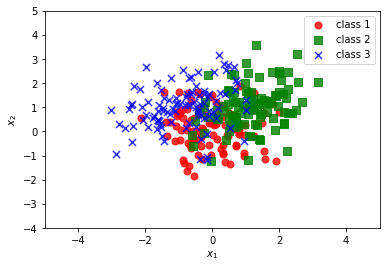

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, marker="o", color='r', label="class 1") #alpha: marker의 투명도
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [4]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [5]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

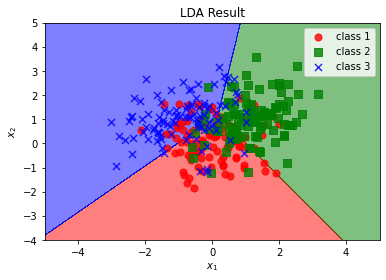

In [6]:
import seaborn as sns
import matplotlib as mpl

x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape) 
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA Result")
plt.show()

# 실습#1 - 데이터 생성
- QDA

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [8]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [9]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [10]:
qda.covariance_

[array([[ 0.73846319, -0.01762041],
        [-0.01762041,  0.72961278]]), array([[0.66534246, 0.21132313],
        [0.21132313, 0.78806006]]), array([[0.9351386 , 0.22880955],
        [0.22880955, 0.79142383]])]

In [11]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [12]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [13]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

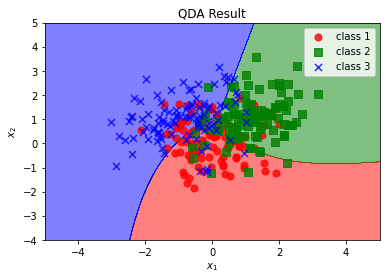

In [14]:
import seaborn as sns
import matplotlib as mpl

x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("QDA Result")
plt.legend()
plt.show()

# 실습#2 - Iris Data
- LDA

In [15]:
#데이터 불러오기
import seaborn as sns #seaborn을 불러오고 네임스페이스를 sns로 축약
iris = sns.load_dataset('iris')  #iris라는 변수명으로 Iris 데이터셋 download

X = iris.drop('species', axis=1) #'species'열을 drop하고 input X를 정의
y_ = iris['species']

In [16]:
#y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() #class label
y = classle.fit_transform(iris['species'].values) #species 열의 문자열을 범주형으로 변환

In [17]:
#전체 데이터를 학습과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split

#X(입력변수)와 y(종속변수)로 이루어진 데이터를 학습과 테스트 데이터넷으로 각각 70%, 30%의 비율로 나눔
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) 

In [18]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y_.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [20]:
#Iris data에 대한 LDA 적합
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(store_covariance=True)
#lda=LinearDiscriminantAnalysis(n_components=2, store_covariance=True)

lda.fit(X_train, y_train) # LDA 적합
y_train_pred=lda.predict(X_train)
y_test_pred=lda.predict(X_test)

In [21]:
#Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))  
print(accuracy_score(y_test,y_test_pred))    

0.9809523809523809
1.0


In [22]:
#분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))  #각 행은 setosa, versicolor, virginica

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [23]:
print('Means:\n', lda.means_)
print('Xbar:\n', lda.xbar_)
print('Cov:\n', lda.covariance_)
print('Intercept:\n', lda.intercept_)
print('Coef:\n', lda.coef_)

Means:
 [[5.02285714 3.43428571 1.45714286 0.24285714]
 [5.87142857 2.78       4.27428571 1.32285714]
 [6.67714286 2.99428571 5.63714286 2.02571429]]
Xbar:
 [5.85714286 3.06952381 3.78952381 1.19714286]
Cov:
 [[0.23328435 0.0848381  0.15550748 0.03332517]
 [0.0848381  0.11041633 0.05572245 0.02952109]
 [0.15550748 0.05572245 0.18527891 0.04515646]
 [0.03332517 0.02952109 0.04515646 0.04413605]]
Intercept:
 [-14.3197418    0.28081332 -33.12154089]
Coef:
 [[  5.64326572  11.49965842 -16.50799293 -16.06675257]
 [ -2.16936235  -3.94301018   5.10483869   1.81942664]
 [ -3.47390337  -7.55664824  11.40315424  14.24732594]]


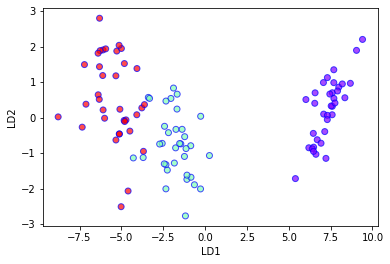

In [24]:
#Scatter plot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis()
X_lda = cld.fit_transform(X_train, y_train)

from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y_train,cmap='rainbow',alpha=0.7,edgecolors='b');

# 실습#2 - Iris Data
- QDA

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train) # QDA 적합
y_train_pred=qda.predict(X_train)
y_test_pred=qda.predict(X_test)

In [26]:
#Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9809523809523809
0.9777777777777777


In [27]:
#분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [28]:
print('Means:\n', qda.means_)
print('Cov:\n', qda.covariance_)

Means:
 [[5.02285714 3.43428571 1.45714286 0.24285714]
 [5.87142857 2.78       4.27428571 1.32285714]
 [6.67714286 2.99428571 5.63714286 2.02571429]]
Cov:
 [array([[ 0.13122689,  0.09478151,  0.01983193,  0.00546218],
       [ 0.09478151,  0.13584874,  0.01415966, -0.00063025],
       [ 0.01983193,  0.01415966,  0.03840336,  0.00659664],
       [ 0.00546218, -0.00063025,  0.00659664,  0.00781513]]), array([[0.20739496, 0.07235294, 0.15836134, 0.05243697],
       [0.07235294, 0.08929412, 0.07741176, 0.04341176],
       [0.15836134, 0.07741176, 0.21020168, 0.07442857],
       [0.05243697, 0.04341176, 0.07442857, 0.0429916 ]]), array([[0.38181513, 0.09486555, 0.30205042, 0.04501681],
       [0.09486555, 0.11584874, 0.08051261, 0.04838655],
       [0.30205042, 0.08051261, 0.32357983, 0.05842857],
       [0.04501681, 0.04838655, 0.05842857, 0.0854958 ]])]
